In [4]:
#https://github.com/SapavatAthira/Machine_Learning_-Breast-cancer-using-KNN-
# K-Nearest Neighbors (KNN): Finding the Optimal k
# Breast Cancer Classification Case Study
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                             roc_curve, roc_auc_score, f1_score, precision_recall_curve)
import warnings
warnings.filterwarnings('ignore')


In [5]:
# Set visual style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("colorblind")  

In [6]:
# 1. DATA LOADING AND EXPLORATION
print("="*70)
print("K-NEAREST NEIGHBORS TUTORIAL: FINDING THE OPTIMAL k")
print("="*70)

# Load dataset
print("\n1. LOADING AND EXPLORING THE DATASET")
print("-"*50)

# Load the Wisconsin Breast Cancer Dataset
# Dataset source: UCI Machine Learning Repository
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

data_path = r"C:\Users\sapav\Desktop\Data science and AI Notes\16th OCT - KNN\16th - KNN\projects\KNN\brest cancer.csv"
df = pd.read_csv(data_path, header=None)

# Rename columns for clarity
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 
             'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 
             'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns = col_names

print(f"Dataset shape: {df.shape}")
print(f"Features: {df.columns.tolist()}")
print(f"\nFirst few rows:")
print(df.head())


K-NEAREST NEIGHBORS TUTORIAL: FINDING THE OPTIMAL k

1. LOADING AND EXPLORING THE DATASET
--------------------------------------------------
Dataset shape: (699, 11)
Features: ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']

First few rows:
        Id  Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0  1000025                5                     1                      1   
1  1002945                5                     4                      4   
2  1015425                3                     1                      1   
3  1016277                6                     8                      8   
4  1017023                4                     1                      1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
0                  1                            2           1   
1                  5

In [7]:
# 2. DATA PREPROCESSING
print("\n\n2. DATA PREPROCESSING")
print("-"*50)

# Drop Id column (not useful for prediction)
df.drop('Id', axis=1, inplace=True)

# Convert Bare_Nuclei to numeric (handles '?' values)
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

# Check missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Explore target variable
print("\nTarget variable distribution:")
class_distribution = df['Class'].value_counts()
print(class_distribution)

# Convert class labels to meaningful names
df['Class'] = df['Class'].replace({2: 'Benign', 4: 'Malignant'})
print("\nClass distribution with labels:")
print(df['Class'].value_counts())

# Percentage distribution
print("\nPercentage distribution:")
print(df['Class'].value_counts(normalize=True).round(3) * 100)




2. DATA PREPROCESSING
--------------------------------------------------
Missing values in each column:
Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Target variable distribution:
Class
2    458
4    241
Name: count, dtype: int64

Class distribution with labels:
Class
Benign       458
Malignant    241
Name: count, dtype: int64

Percentage distribution:
Class
Benign       65.5
Malignant    34.5
Name: proportion, dtype: float64




3. DATA VISUALIZATION
--------------------------------------------------


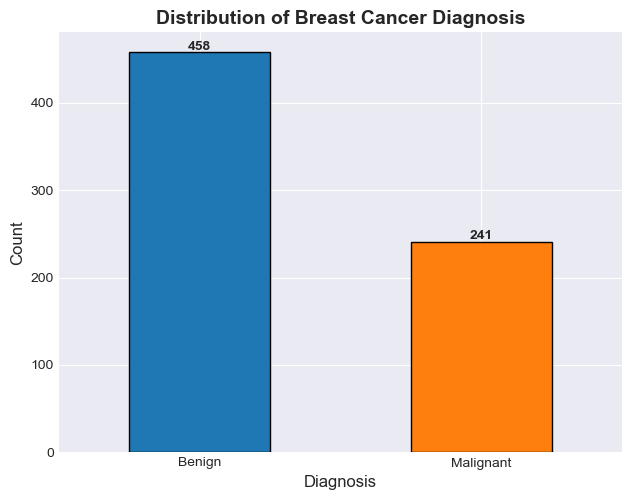

In [8]:
# 3. VISUALIZATIONS
print("\n\n3. DATA VISUALIZATION")
print("-"*50)

# Create figure with subplots
fig = plt.figure(figsize=(16, 12))

# 3.1 Class distribution
plt.subplot(2, 2, 1)
colors = ['#1f77b4', '#ff7f0e']  # Colorblind-friendly colors
df['Class'].value_counts().plot(kind='bar', color=colors, edgecolor='black')
plt.title('Distribution of Breast Cancer Diagnosis', fontsize=14, fontweight='bold')
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
for i, v in enumerate(df['Class'].value_counts()):
    plt.text(i, v + 3, str(v), ha='center', fontweight='bold')


Text(0.5, 1.0, 'Feature Correlation Matrix')

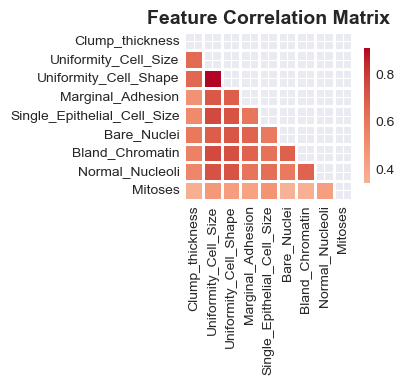

In [9]:
# 3.2 Correlation heatmap
plt.subplot(2, 2, 2)
correlation = df.drop('Class', axis=1).corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap(correlation, mask=mask, square=True, annot=False, 
            cmap='coolwarm', center=0, linewidths=1, 
            cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')


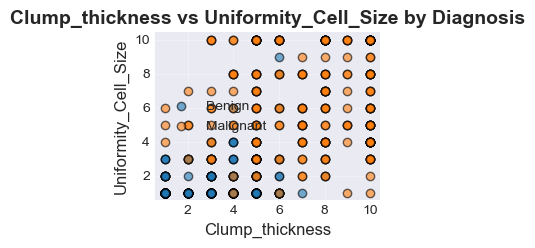

In [10]:
# 3.3 Feature distribution by class
plt.subplot(2, 2, 3)
# Select two important features for visualization
feature1, feature2 = 'Clump_thickness', 'Uniformity_Cell_Size'
for class_label, color in zip(['Benign', 'Malignant'], colors):
    subset = df[df['Class'] == class_label]
    plt.scatter(subset[feature1], subset[feature2], 
                alpha=0.6, label=class_label, color=color, edgecolor='black')
plt.xlabel(feature1, fontsize=12)
plt.ylabel(feature2, fontsize=12)
plt.title(f'{feature1} vs {feature2} by Diagnosis', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

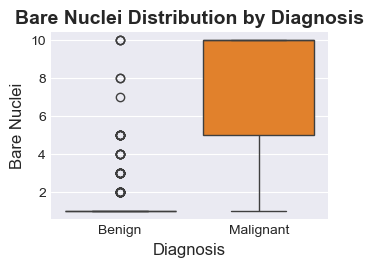

In [11]:
# 3.4 Boxplot of key feature
plt.subplot(2, 2, 4)
sns.boxplot(x='Class', y='Bare_Nuclei', data=df, palette=colors)
plt.title('Bare Nuclei Distribution by Diagnosis', fontsize=14, fontweight='bold')
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Bare Nuclei', fontsize=12)

plt.tight_layout()
plt.savefig('data_visualizations.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
# 4. DATA PREPARATION FOR MODELING
print("\n\n4. DATA PREPARATION FOR MODELING")
print("-"*50)

# Preparing features and target
X = df.drop(['Class'], axis=1)
y = df['Class'].map({'Benign': 0, 'Malignant': 1})  # Convert to binary

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training set class distribution: {pd.Series(y_train).value_counts().to_dict()}")
print(f"Test set class distribution: {pd.Series(y_test).value_counts().to_dict()}")

# Handling missing values with median imputation
for df1 in [X_train, X_test]:
    for col in X_train.columns:
        col_median = X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

# Featuring scaling (critical for distance-based algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n Data preprocessing completed")
print(" Missing values imputed")
print("Features standardized")



4. DATA PREPARATION FOR MODELING
--------------------------------------------------
Training set size: 559 samples
Test set size: 140 samples
Training set class distribution: {0: 366, 1: 193}
Test set class distribution: {0: 92, 1: 48}

 Data preprocessing completed
 Missing values imputed
Features standardized


In [13]:
# 5. KNN FUNDAMENTALS: UNDERSTANDING THE IMPACT OF k
print("\n\n5. UNDERSTANDING THE IMPACT OF k IN KNN")
print("-"*50)

print("""
Key Concepts:
• k = number of nearest neighbors to consider
• Small k (e.g., 1-3): High variance, low bias (can overfit)
• Large k (e.g., >20): High bias, low variance (can underfit)
• Optimal k balances bias-variance tradeoff

""")



5. UNDERSTANDING THE IMPACT OF k IN KNN
--------------------------------------------------

Key Concepts:
• k = number of nearest neighbors to consider
• Small k (e.g., 1-3): High variance, low bias (can overfit)
• Large k (e.g., >20): High bias, low variance (can underfit)
• Optimal k balances bias-variance tradeoff




In [14]:
# 6. FINDING THE OPTIMAL k
print("\n\n6. FINDING THE OPTIMAL k VALUE")
print("-"*50)

# Test different k values
k_range = range(1, 31)
train_scores = []
test_scores = []
cv_scores = []

for k in k_range:
    # Create and train KNN model
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train_scaled, y_train)
    
    # Training accuracy
    train_pred = knn.predict(X_train_scaled)
    train_scores.append(accuracy_score(y_train, train_pred))
    
    # Test accuracy
    test_pred = knn.predict(X_test_scaled)
    test_scores.append(accuracy_score(y_test, test_pred))
    
    # Cross-validation score (5-fold)
    cv_score = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy').mean()
    cv_scores.append(cv_score)

# Find optimal k
optimal_k = k_range[np.argmax(cv_scores)]
print(f"Optimal k value from cross-validation: {optimal_k}")



6. FINDING THE OPTIMAL k VALUE
--------------------------------------------------
Optimal k value from cross-validation: 3




7. VISUALIZING k vs MODEL PERFORMANCE
--------------------------------------------------


(0.85, 1.0)

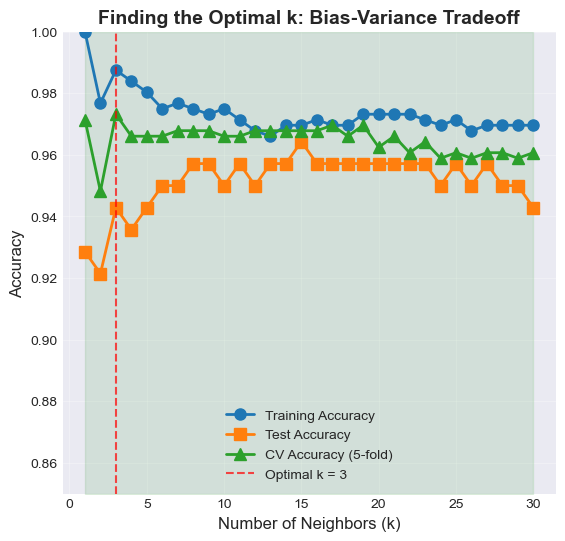

In [15]:
# 7. VISUALIZING k vs ACCURACY
print("\n\n7. VISUALIZING k vs MODEL PERFORMANCE")
print("-"*50)

plt.figure(figsize=(14, 6))

# Plot 1: Accuracy vs k
plt.subplot(1, 2, 1)
plt.plot(k_range, train_scores, 'o-', linewidth=2, markersize=8, label='Training Accuracy', color='#1f77b4')
plt.plot(k_range, test_scores, 's-', linewidth=2, markersize=8, label='Test Accuracy', color='#ff7f0e')
plt.plot(k_range, cv_scores, '^-', linewidth=2, markersize=8, label='CV Accuracy (5-fold)', color='#2ca02c')

# Highlight optimal k
plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Optimal k = {optimal_k}')
plt.fill_between(k_range, 0.85, 1.0, alpha=0.1, color='green')

plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Finding the Optimal k: Bias-Variance Tradeoff', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.ylim(0.85, 1.0)

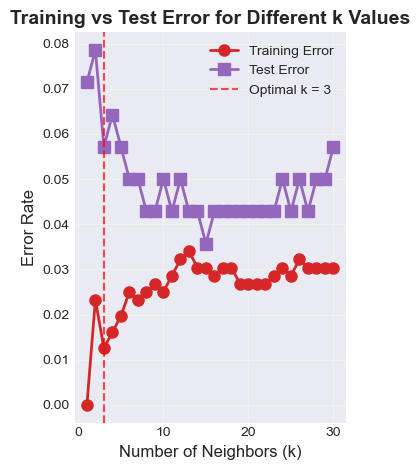

In [16]:
# Plot 2: Error rates
plt.subplot(1, 2, 2)
train_errors = [1 - score for score in train_scores]
test_errors = [1 - score for score in test_scores]

plt.plot(k_range, train_errors, 'o-', linewidth=2, markersize=8, label='Training Error', color='#d62728')
plt.plot(k_range, test_errors, 's-', linewidth=2, markersize=8, label='Test Error', color='#9467bd')
plt.axvline(x=optimal_k, color='red', linestyle='--', alpha=0.7, label=f'Optimal k = {optimal_k}')

plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.title('Training vs Test Error for Different k Values', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('k_vs_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

In [17]:
# 8. MODEL EVALUATION WITH OPTIMAL k
print("\n\n8. MODEL EVALUATION WITH OPTIMAL k")
print("-"*50)

# Train final model with optimal k
final_knn = KNeighborsClassifier(n_neighbors=optimal_k, metric='euclidean')
final_knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = final_knn.predict(X_test_scaled)
y_pred_prob = final_knn.predict_proba(X_test_scaled)[:, 1]

print(f"Model Configuration:")
print(f"• k = {optimal_k}")
print(f"• Distance metric = Euclidean")
print(f"• Algorithm = Auto")

print(f"\nPerformance Metrics:")
print(f"• Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"• F1-Score: {f1_score(y_test, y_pred):.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(f"\nConfusion Matrix:")
print(cm)

# Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))



8. MODEL EVALUATION WITH OPTIMAL k
--------------------------------------------------
Model Configuration:
• k = 3
• Distance metric = Euclidean
• Algorithm = Auto

Performance Metrics:
• Accuracy: 0.9429
• F1-Score: 0.9167

Confusion Matrix:
[[88  4]
 [ 4 44]]

Detailed Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.96      0.96        92
   Malignant       0.92      0.92      0.92        48

    accuracy                           0.94       140
   macro avg       0.94      0.94      0.94       140
weighted avg       0.94      0.94      0.94       140



In [18]:
# 9. ADVANCED ANALYSIS: WEIGHTED KNN
print("\n\n9. ADVANCED ANALYSIS: WEIGHTED KNN")
print("-"*50)

print("""
Weighted KNN Concept:
---------------------
• Closer neighbors have more influence than distant ones
• Weight = 1/distance (or other functions)
• Can improve performance when data density varies
""")

# Compare uniform vs weighted KNN
knn_uniform = KNeighborsClassifier(n_neighbors=optimal_k, weights='uniform')
knn_distance = KNeighborsClassifier(n_neighbors=optimal_k, weights='distance')

knn_uniform.fit(X_train_scaled, y_train)
knn_distance.fit(X_train_scaled, y_train)

y_pred_uniform = knn_uniform.predict(X_test_scaled)
y_pred_distance = knn_distance.predict(X_test_scaled)

print("\nComparison of Weighting Schemes:")
print(f"{'Metric':<20} {'Uniform':<10} {'Distance':<10}")
print("-"*40)
print(f"{'Accuracy':<20} {accuracy_score(y_test, y_pred_uniform):<10.4f} {accuracy_score(y_test, y_pred_distance):<10.4f}")
print(f"{'F1-Score':<20} {f1_score(y_test, y_pred_uniform):<10.4f} {f1_score(y_test, y_pred_distance):<10.4f}")




9. ADVANCED ANALYSIS: WEIGHTED KNN
--------------------------------------------------

Weighted KNN Concept:
---------------------
• Closer neighbors have more influence than distant ones
• Weight = 1/distance (or other functions)
• Can improve performance when data density varies


Comparison of Weighting Schemes:
Metric               Uniform    Distance  
----------------------------------------
Accuracy             0.9429     0.9429    
F1-Score             0.9167     0.9167    




10. ROC CURVE AND MODEL DISCRIMINATION
--------------------------------------------------


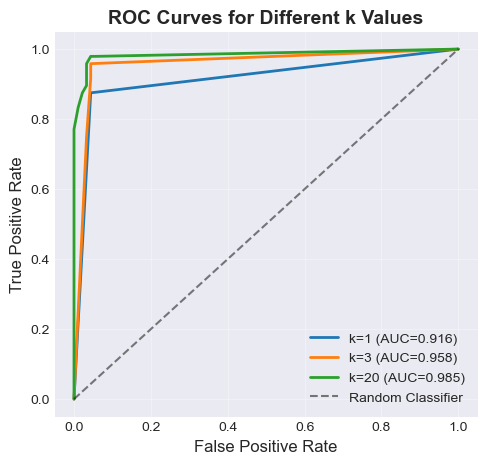

In [19]:
# 10. ROC CURVE AND AUC ANALYSIS
print("\n\n10. ROC CURVE AND MODEL DISCRIMINATION")
print("-"*50)

# Calculate ROC curve for different k values
plt.figure(figsize=(12, 5))

# Plot ROC curves for different k values
plt.subplot(1, 2, 1)
k_values_to_plot = [1, optimal_k, 20]
colors_roc = ['#1f77b4', '#ff7f0e', '#2ca02c']

for k, color in zip(k_values_to_plot, colors_roc):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    y_pred_prob_temp = knn_temp.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob_temp)
    auc_score = roc_auc_score(y_test, y_pred_prob_temp)
    plt.plot(fpr, tpr, linewidth=2, label=f'k={k} (AUC={auc_score:.3f})', color=color)

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for Different k Values', fontsize=14, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

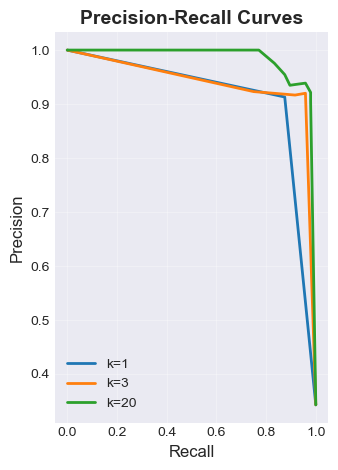

In [27]:
# Plot Precision-Recall curve
plt.subplot(1, 2, 2)
for k, color in zip(k_values_to_plot, colors_roc):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train_scaled, y_train)
    y_pred_prob_temp = knn_temp.predict_proba(X_test_scaled)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_temp)
    plt.plot(recall, precision, linewidth=2, label=f'k={k}', color=color)

plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curves', fontsize=14, fontweight='bold')
plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

In [21]:
# 11. CROSS-VALIDATION FOR ROBUST EVALUATION
print("\n\n11. CROSS-VALIDATION RESULTS")
print("-"*50)

# Perform 10-fold cross-validation with optimal k
cv_scores = cross_val_score(
    final_knn, 
    X_train_scaled, 
    y_train, 
    cv=10, 
    scoring='accuracy'
)

print(f"10-Fold Cross-Validation Accuracy Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f}")

print(f"\nMean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")
print(f"95% Confidence Interval: [{cv_scores.mean() - 1.96*cv_scores.std():.4f}, "
      f"{cv_scores.mean() + 1.96*cv_scores.std():.4f}]")



11. CROSS-VALIDATION RESULTS
--------------------------------------------------
10-Fold Cross-Validation Accuracy Scores:
  Fold 1: 0.9643
  Fold 2: 1.0000
  Fold 3: 0.9643
  Fold 4: 0.9464
  Fold 5: 0.9643
  Fold 6: 0.9821
  Fold 7: 0.9643
  Fold 8: 0.9821
  Fold 9: 0.9643
  Fold 10: 0.9818

Mean CV Accuracy: 0.9714
Standard Deviation: 0.0143
95% Confidence Interval: [0.9434, 0.9993]


In [22]:
# 12. GRID SEARCH FOR HYPERPARAMETER TUNING
print("\n\n12. COMPREHENSIVE HYPERPARAMETER TUNING")
print("-"*50)

# Define parameter grid
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2]  # 1: Manhattan, 2: Euclidean (for minkowski)
}

print("Performing Grid Search (this may take a minute)...")

# Perform grid search
grid_search = GridSearchCV(
    KNeighborsClassifier(),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train_scaled, y_train)

print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")



12. COMPREHENSIVE HYPERPARAMETER TUNING
--------------------------------------------------
Performing Grid Search (this may take a minute)...

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Cross-Validation Score: 0.9785


In [23]:
# Evaluate best model
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test_scaled)
print(f"Test Accuracy with Best Model: {accuracy_score(y_test, y_pred_best):.4f}")

Test Accuracy with Best Model: 0.9357


In [24]:
#CONCLUSION AND SUMMARY
print("\n\n14. SUMMARY AND KEY TAKEAWAYS")
print("-"*50)

# Create summary dataframe
summary_data = {
    'Metric': ['Optimal k', 'Test Accuracy', 'F1-Score', 'ROC-AUC', 
               'CV Accuracy Mean', 'CV Accuracy Std'],
    'Value': [
        optimal_k,
        f"{accuracy_score(y_test, y_pred):.4f}",
        f"{f1_score(y_test, y_pred):.4f}",
        f"{roc_auc_score(y_test, y_pred_prob):.4f}",
        f"{cv_scores.mean():.4f}",
        f"{cv_scores.std():.4f}"
    ]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

print("TUTORIAL COMPLETED SUCCESSFULLY!")

print("""
Key Learnings:
--------------
1. k significantly impacts KNN performance through bias-variance tradeoff
2. Cross-validation is essential for reliable hyperparameter selection
3. Feature scaling is critical for distance-based algorithms
4. Weighted KNN can improve performance in heterogeneous datasets
5. Always validate model performance on unseen test data
""")



14. SUMMARY AND KEY TAKEAWAYS
--------------------------------------------------
          Metric  Value
       Optimal k      3
   Test Accuracy 0.9429
        F1-Score 0.9167
         ROC-AUC 0.9579
CV Accuracy Mean 0.9714
 CV Accuracy Std 0.0143
TUTORIAL COMPLETED SUCCESSFULLY!

Key Learnings:
--------------
1. k significantly impacts KNN performance through bias-variance tradeoff
2. Cross-validation is essential for reliable hyperparameter selection
3. Feature scaling is critical for distance-based algorithms
4. Weighted KNN can improve performance in heterogeneous datasets
5. Always validate model performance on unseen test data

